<a href="https://colab.research.google.com/github/kishore0000123/Kiran/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing packages
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Insurance_Fraud_Detection (1).csv')
df.head()

,Claim_ID,Claim_Amount,Claim_Date,Claim_Type,Claimant_Age,Policy_Type,Policy_Duration,Previous_Claims,Is_Fraudulent,Claim_Reason
0,01029d41-2dad-4535-b84e-cf0ed1a28c5b,37237.0,2023-02-10,Theft,33.0,Premium,3,2,1,Unknown
1,515f32cd-7eeb-464b-88fb-d39480d82c88,8055.0,2024-06-25,Fire,45.0,Basic,3,2,0,Accident
2,64d67823-e1b2-4487-af40-8a35d72a13be,18363.0,2021-09-01,Accident,20.0,Basic,1,3,1,Unknown
3,81d964ce-a75e-4964-989c-8a7e1e130d5b,42454.0,2020-04-28,Theft,31.0,Basic,3,4,0,Unknown
4,98bfae46-c0fa-44ee-9ef2-6432743a36fe,12698.0,2020-03-17,Natural Disaster,19.0,Basic,5,3,1,Accident


In [7]:
# See the no. of rows and columns
df.shape

(999, 10)

In [8]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Claim_ID', 'Claim_Amount', 'Claim_Date', 'Claim_Type', 'Claimant_Age', 'Policy_Type', 'Policy_Duration', 'Previous_Claims', 'Is_Fraudulent', 'Claim_Reason']


In [9]:
# Display data type of each feature
df.dtypes

,0
Claim_ID,object
Claim_Amount,float64
Claim_Date,object
Claim_Type,object
Claimant_Age,float64
Policy_Type,object
Policy_Duration,int64
Previous_Claims,int64
Is_Fraudulent,int64
Claim_Reason,object


In [10]:
df.describe()

,Claim_Amount,Claimant_Age,Policy_Duration,Previous_Claims,Is_Fraudulent
count,906.000000,951.000000,999.000000,999.000000,999.000000
mean,25829.027594,43.399579,5.087087,1.971972,0.483483
std,14246.543763,14.828641,2.536986,1.398974,0.499977
min,1109.000000,18.000000,1.000000,0.000000,0.000000
25%,13396.000000,31.000000,3.000000,1.000000,0.000000
50%,25970.000000,44.000000,5.000000,2.000000,0.000000
75%,38237.000000,56.000000,7.000000,3.000000,1.000000
max,49959.000000,69.000000,9.000000,4.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Claim_ID         999 non-null    object 
 1   Claim_Amount     906 non-null    float64
 2   Claim_Date       999 non-null    object 
 3   Claim_Type       926 non-null    object 
 4   Claimant_Age     951 non-null    float64
 5   Policy_Type      999 non-null    object 
 6   Policy_Duration  999 non-null    int64  
 7   Previous_Claims  999 non-null    int64  
 8   Is_Fraudulent    999 non-null    int64  
 9   Claim_Reason     999 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [12]:
# find the null values
df.isnull().sum()

,0
Claim_ID,0
Claim_Amount,93
Claim_Date,0
Claim_Type,73
Claimant_Age,48
Policy_Type,0
Policy_Duration,0
Previous_Claims,0
Is_Fraudulent,0
Claim_Reason,0


In [13]:
# Remove unwanted columns
df.drop(columns=['Claim_ID'], inplace=True)  # specify the columns to remove

In [14]:
df.describe()

,Claim_Amount,Claimant_Age,Policy_Duration,Previous_Claims,Is_Fraudulent
count,906.000000,951.000000,999.000000,999.000000,999.000000
mean,25829.027594,43.399579,5.087087,1.971972,0.483483
std,14246.543763,14.828641,2.536986,1.398974,0.499977
min,1109.000000,18.000000,1.000000,0.000000,0.000000
25%,13396.000000,31.000000,3.000000,1.000000,0.000000
50%,25970.000000,44.000000,5.000000,2.000000,0.000000
75%,38237.000000,56.000000,7.000000,3.000000,1.000000
max,49959.000000,69.000000,9.000000,4.000000,1.000000


In [15]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [16]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [17]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [18]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [19]:
# find the null values
df.isnull().sum()

,0
Claim_Amount,0
Claim_Date,0
Claim_Type,0
Claimant_Age,0
Policy_Type,0
Policy_Duration,0
Previous_Claims,0
Is_Fraudulent,0
Claim_Reason,0


In [20]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
df.head()

,Claim_Amount,Claim_Date,Claim_Type,Claimant_Age,Policy_Type,Policy_Duration,Previous_Claims,Is_Fraudulent,Claim_Reason
0,37237.0,502,3,33.0,1,3,2,1,2
1,8055.0,711,1,45.0,0,3,2,0,0
2,18363.0,263,0,20.0,0,1,3,1,2
3,42454.0,48,3,31.0,0,3,4,0,2
4,12698.0,27,2,19.0,0,5,3,1,0


In [22]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [23]:
df.head()

,Claim_Amount,Claim_Date,Claim_Type,Claimant_Age,Policy_Type,Policy_Duration,Previous_Claims,Is_Fraudulent,Claim_Reason
0,0.739570,502,3,0.294118,1,0.25,0.50,1.0,2
1,0.142190,711,1,0.529412,0,0.25,0.50,0.0,0
2,0.353204,263,0,0.039216,0,0.00,0.75,1.0,2
3,0.846366,48,3,0.254902,0,0.25,1.00,0.0,2
4,0.237236,27,2,0.019608,0,0.50,0.75,1.0,0


In [24]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Is_Fraudulent', axis=1)  # -- independent variable
y = df['Is_Fraudulent'] # -- dependent variable

In [25]:
df.head()

,Claim_Amount,Claim_Date,Claim_Type,Claimant_Age,Policy_Type,Policy_Duration,Previous_Claims,Is_Fraudulent,Claim_Reason
0,0.739570,502,3,0.294118,1,0.25,0.50,1.0,2
1,0.142190,711,1,0.529412,0,0.25,0.50,0.0,0
2,0.353204,263,0,0.039216,0,0.00,0.75,1.0,2
3,0.846366,48,3,0.254902,0,0.25,1.00,0.0,2
4,0.237236,27,2,0.019608,0,0.50,0.75,1.0,0


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
df.head()

,Claim_Amount,Claim_Date,Claim_Type,Claimant_Age,Policy_Type,Policy_Duration,Previous_Claims,Is_Fraudulent,Claim_Reason
0,0.739570,502,3,0.294118,1,0.25,0.50,1.0,2
1,0.142190,711,1,0.529412,0,0.25,0.50,0.0,0
2,0.353204,263,0,0.039216,0,0.00,0.75,1.0,2
3,0.846366,48,3,0.254902,0,0.25,1.00,0.0,2
4,0.237236,27,2,0.019608,0,0.50,0.75,1.0,0


In [28]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [30]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.53
Logistic Regression Confusion Matrix:
 [[68 39]
 [55 38]]


In [31]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [33]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.445
Random Forest Confusion Matrix:
 [[49 58]
 [53 40]]


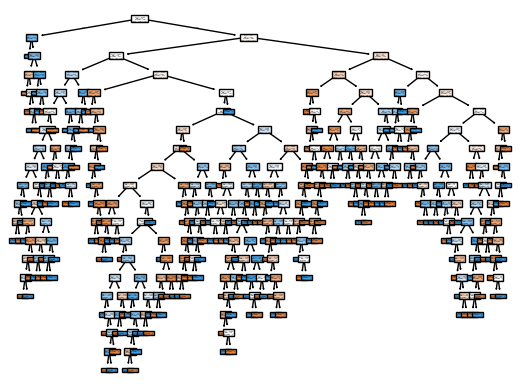

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [35]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [36]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
